In [22]:
import numpy as np
import matplotlib.pyplot as plt
import re

In [31]:
stats = dict()
with open("arena_corr_SB_2.txt", "r") as file:
    for line in file:
        data = eval(line.strip())
        if data["name"] not in stats:
            stats[data["name"]] = []
        stats[data["name"]].append({
            "steps": data["steps"],
            "n_aborts": data["n_aborts"],
            "n_successes": data["n_successes"],
        })

In [26]:
"# Read and parse timing data\n",
timing_stats = {}
with open('arena_corr_SB_times_2.txt', 'r') as f:
    data = None
    for line in f:
        # {
        #   'name': 'RL-ordered n=50 T=7', 
        #   'total_time': 392, 
        #   'decision_time': '392.', 
        #   'conflict_time': '347.', 
        #   'RL_time': '44.3'
        #}
        data = eval(line.strip())
        name = data.get("name")
        total_time = data.get("total_time") or 0
        # decision_time = data.get("decision_time") or 0
        conflict_time = data.get("conflict_time") or 0
        RL_time = data.get("RL_time") or 0

        if name not in timing_stats:
            timing_stats[name] = {}
            timing_stats[name]["total_time"] = []
            # timing_stats[name]["decision_time"] = []
            timing_stats[name]["conflict_time"] = []
            timing_stats[name]["RL_time"] = []

        timing_stats[name]["total_time"].append(total_time)
        # timing_stats[name]["decision_time"].append(decision_time)
        timing_stats[name]["conflict_time"].append(conflict_time)
        timing_stats[name]["RL_time"].append(RL_time)
        # timing_stats[name].append(time / 10)
    # print(timing_stats)

In [38]:
color = {
    "k-smf-k=5": 'black',
    "k-smf-twisted-k=5": 'black',
    "k-smf-twisted-oracle-2-phase-k=5": 'black',

    "RL n=20 T=6": 'red',
    "RL n=20 T=6 filterT": 'red',
    "RL n=20 T=6 skipT": 'orange',
    "RL n=20 T=6 filterT skipT": 'orange',
    "RL-smf n=20 T=6": 'red',
    "RL-smf n=20 T=6 filterT": 'red',
    "RL-smf n=20 T=6 skipT": 'red',
    "RL-smf n=20 T=6 filterT skipT": 'red',

    # "RL n=50 T=6": 'green',
    # "RL n=50 T=6 filterT": 'green',
    "RL n=50 T=6 skipT": 'yellow',
    "RL n=50 T=6 filterT skipT": 'yellow',
    # "RL-smf n=50 T=6": 'green',
    # "RL-smf n=50 T=6 filterT": 'green',
    # "RL-smf n=50 T=6 skipT": 'green',
    # "RL-smf n=50 T=6 filterT skipT": 'green',

    "RL n=100 T=6": 'blue',
    "RL n=100 T=6 filterT": 'blue',
    "RL n=100 T=6 skipT": 'purple',
    "RL n=100 T=6 filterT skipT": 'purple',
    "RL-smf n=100 T=6": 'blue',
    "RL-smf n=100 T=6 filterT": 'blue',
    "RL-smf n=100 T=6 skipT": 'blue',
    "RL-smf n=100 T=6 filterT skipT": 'blue',
}

linestyle = {
    "k-smf-k=5": '-',
    "k-smf-twisted-k=5": '--',
    "k-smf-twisted-oracle-2-phase-k=5": ':',

    "RL n=20 T=6": '-',
    "RL n=20 T=6 filterT": '--',
    "RL n=20 T=6 skipT": '-',
    "RL n=20 T=6 filterT skipT": '--',
    "RL-smf n=20 T=6": ':',
    "RL-smf n=20 T=6 filterT": '-.',

    "RL n=50 T=6": '-',
    "RL n=50 T=6 filterT": '--',
    "RL n=50 T=6 skipT": '-',
    "RL n=50 T=6 filterT skipT": '--',
    "RL-smf n=50 T=6": ':',
    "RL-smf n=50 T=6 filterT": '-.',

    "RL n=100 T=6": '-',
    "RL n=100 T=6 filterT": '--',
    "RL n=100 T=6 skipT": '-',
    "RL n=100 T=6 filterT skipT": '--',
    "RL-smf n=100 T=6": ':',
    "RL-smf n=100 T=6 filterT": '-.',
}

k-smf-k=5 218
k-smf-twisted-k=5 178
k-smf-twisted-oracle-2-phase-k=5 172
RL n=20 T=6 158
RL n=20 T=6 filterT 537
RL n=20 T=6 skipT 301
RL n=20 T=6 filterT skipT 301
RL-smf n=20 T=6 168
RL n=50 T=6 537
RL n=50 T=6 filterT 537
RL n=50 T=6 skipT 132
RL n=50 T=6 filterT skipT 132
RL-smf n=50 T=6 172
RL n=100 T=6 537
RL n=100 T=6 filterT 536
RL n=100 T=6 skipT 85
RL n=100 T=6 filterT skipT 85
RL-smf n=100 T=6 173


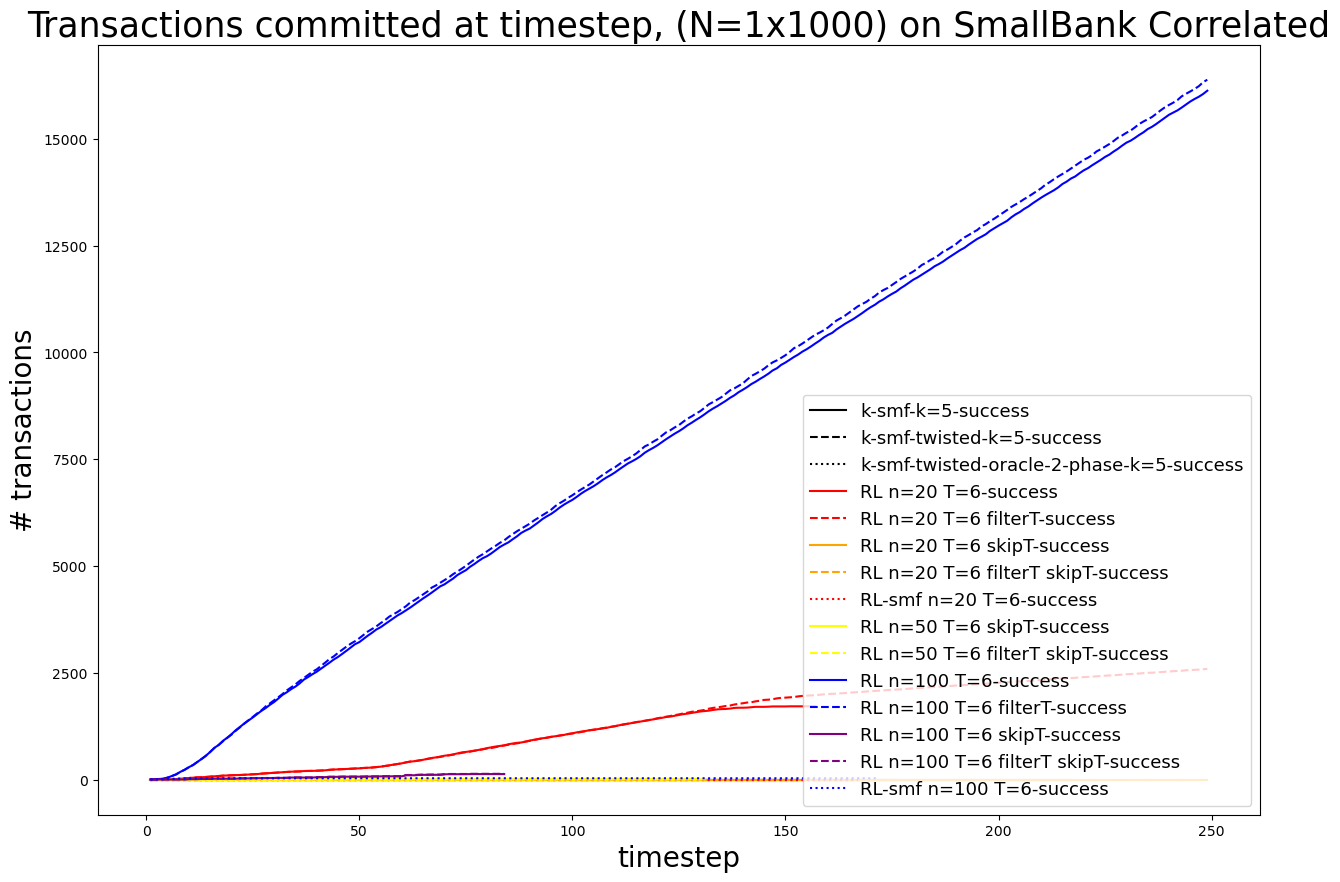

In [41]:
plt.figure(figsize=(15,10))
t_cutoff = 250
for contestant in stats.keys():
    print(contestant, len(stats[contestant]))
    if color.get(contestant) and linestyle.get(contestant):
      plt.plot([elem["steps"] for elem in stats[contestant] if elem["steps"] < t_cutoff],
               [elem["n_aborts"] for elem in stats[contestant] if elem["steps"] < t_cutoff],
                label=f"{contestant}-success",
                color = color[contestant],
                linestyle = linestyle[contestant])
    # plt.plot([elem["steps"] for elem in stats[contestant] if elem["steps"] < t_cutoff], [elem["n_aborts"] for elem in stats[contestant] if elem["steps"] < t_cutoff], label=f"{contestant}-aborts")
plt.xlabel("timestep", size=20) 
plt.ylabel("# transactions", size=20)
plt.legend(loc='lower right', prop={'size': 13})
plt.title("Transactions committed at timestep, (N=1x1000) on SmallBank Correlated", size=25)
plt.show()

In [34]:
# for name in timing_stats.keys():
#     print('\n', name)
#     for key in timing_stats[name].keys():
#         print(key, 'sum:', sum(timing_stats[name][key]))
#         print(key, 'step avg:', f'{sum(timing_stats[name][key]) / len(timing_stats[name][key]):.4f}')
names = ["k-smf-k=5", "k-smf-twisted-k=5", "k-smf-twisted-oracle-2-phase-k=5",
    "RL n=20 T=6", "RL n=50 T=6", "RL n=100 T=6",
    "RL n=20 T=6", "RL n=50 T=6", "RL n=100 T=6",
    "RL-smf n=20 T=6", "RL-smf n=50 T=6", "RL-smf n=100 T=6",
    ]
for name in names:
    print(name, " makespan :", len(timing_stats[name]["total_time"]))

k-smf-k=5  makespan : 218
k-smf-twisted-k=5  makespan : 178
k-smf-twisted-oracle-2-phase-k=5  makespan : 172
RL n=20 T=6  makespan : 158
RL n=50 T=6  makespan : 537
RL n=100 T=6  makespan : 537
RL-smf n=20 T=6  makespan : 168
RL-smf n=50 T=6  makespan : 172
RL-smf n=100 T=6  makespan : 173


RL-ordered k-smf n=50 T=7 avg 75.2396
k-smf-twisted-k=5 avg 5.7889


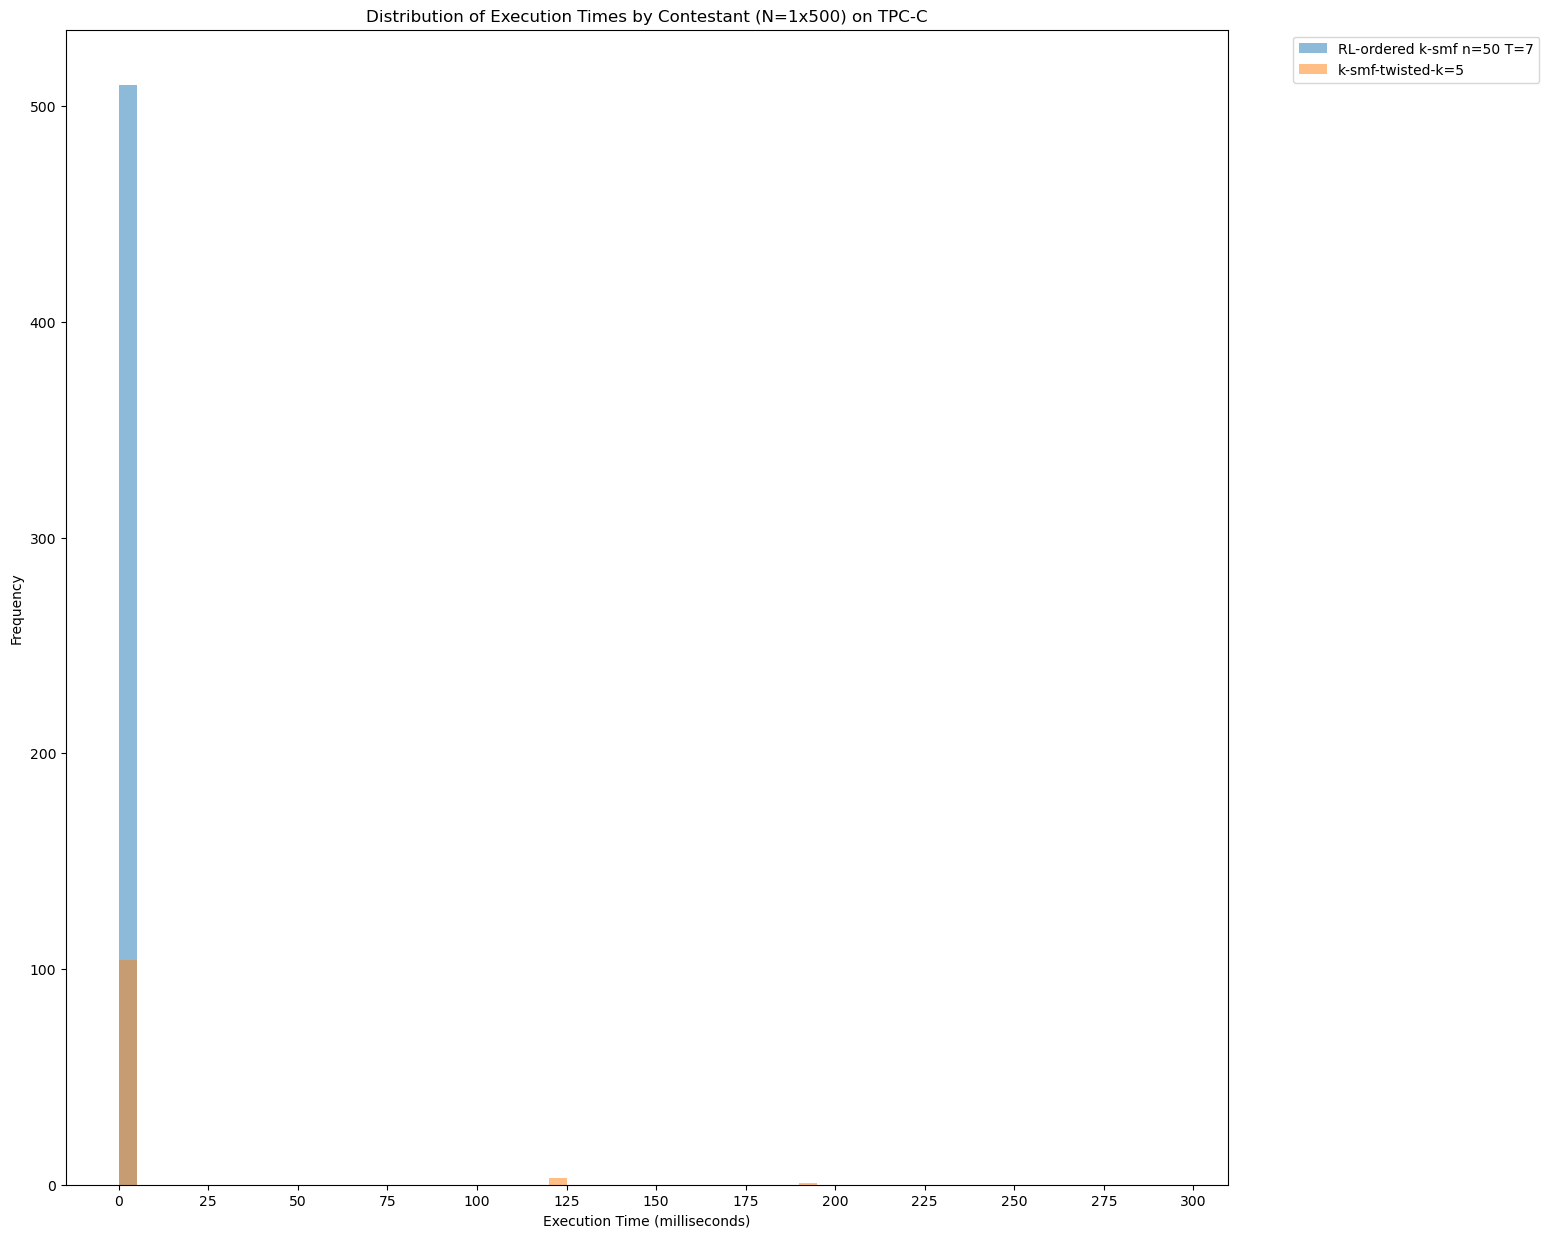

In [3]:
# "# Plot histogram for each contestant\n",
# plt.figure(figsize=(15,15))
# for name in timing_stats.keys():
#     plt.hist(timing_stats[name], alpha=0.5, label=name, bins=range(0, 300, 5))
#     print(name, 'avg', f'{sum(timing_stats[name]) / len(timing_stats[name]):.4f}')
#     # plt.plot([elem["steps"] for elem in stats[contestant] if elem["steps"] < t_cutoff], [elem["n_aborts"] for elem in stats[contestant] if elem["steps"] < t_cutoff], label=f"{contestant}-aborts")
# plt.xlabel('Execution Time (milliseconds)')
# plt.ylabel('Frequency')

# plt.gca().xaxis.set_major_locator(plt.MaxNLocator(15))
# # plt.gca().xaxis.set_major_locator(plt.LogLocator(base=10, numticks=15))  # Reduce number of ticks
# # plt.gca().xaxis.set_major_formatter(plt.ScalarFormatter())  # Use regular number formatting

# plt.title('Distribution of Execution Times by Contestant (N=1x500) on TPC-C')
# plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# # plt.grid(True, which="both", ls="-", alpha=0.9)
# # plt.tight_layout()
# plt.show()